In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_all = pd.read_csv('full.csv')
titanic_all.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [3]:
titanic_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [4]:
titanic_all.PassengerId.unique()[-1] == len(titanic_all) #not necessary for analysis

True

In [5]:
def printUniqueVals(col_name):
    print(titanic_all[col_name].unique())

In [6]:
for col in titanic_all.columns:
    print(col)
    printUniqueVals(col)

PassengerId
[   1    2    3 ... 1307 1308 1309]
Survived
[ 0.  1. nan]
Pclass
[3 1 2]
Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
Sex
['male' 'female']
Age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
SibSp
[1 0 3 4 2 5 8]
Parch
[0 1 2 5 3 4 6 9]
Ticket
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113

## Names

Checking for duplicates rows

In [7]:
len(titanic_all.Name.unique()) == len(titanic_all) #not necessary for analysis

False

In [8]:
name_freq = titanic_all.groupby('Name').size().sort_values(ascending=False)
name_freq

Name
Connolly, Miss. Kate                               2
Kelly, Mr. James                                   2
van Melkebeke, Mr. Philemon                        1
Garfirth, Mr. John                                 1
Gaskell, Mr. Alfred                                1
Gavey, Mr. Lawrence                                1
Gee, Mr. Arthur H                                  1
Geiger, Miss. Amalie                               1
Gheorgheff, Mr. Stanio                             1
Gibson, Miss. Dorothy Winifred                     1
Gibson, Mrs. Leonard (Pauline C Boeson)            1
Giglio, Mr. Victor                                 1
Gilbert, Mr. William                               1
Giles, Mr. Edgar                                   1
Giles, Mr. Frederick Edward                        1
Giles, Mr. Ralph                                   1
Gilinski, Mr. Eliezer                              1
Gill, Mr. John William                             1
Gillespie, Mr. William Henry             

In [9]:
titanic_all[titanic_all['Name'] == 'Connolly, Miss. Kate'] #ok, different person

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,...,Q,734.0,"Connolly, Miss Katherine ""Kate""",22.0,"Cortrasna, Cavan, Ireland",Queenstown,New York City,13,NaN,3.0
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,...,Q,733.0,"Connolly, Miss Catherine ""Kate""",35.0,"Bank Place, Tipperary, Ireland",Queenstown,"Dobbs Ferry, New York, US",NaN,NaN,3.0


In [10]:
titanic_all[titanic_all['Name'] == 'Kelly, Mr. James'] #ok, different person

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,...,S,929.0,"Kelly, Mr. James",44.0,"Leixlip, Kildare, Ireland",Queenstown,"New Haven, Connecticut, US",NaN,NaN,3.0
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0


In [11]:
len(titanic_all.Name_wiki.unique()) == len(titanic_all)

False

In [12]:
name_wiki_freq = titanic_all.groupby('Name_wiki').size().sort_values(ascending=False)
name_wiki_freq

Name_wiki
Kelly, Mr. James                                   2
Čulumović, Mr. Jeso                                1
Graham, Mrs. Edith Ware (née Junkins)              1
Goodwin, Miss Lillian Amy                          1
Goodwin, Mr. Charles Edward                        1
Goodwin, Mr. Frederick Joseph                      1
Goodwin, Mrs. Augusta (née Tyler)                  1
Gracie IV, Colonel Archibald                       1
Graham, Miss Margaret Edith                        1
Graham, Mr. George Edward                          1
Green, Mr. George Henry                            1
Goodwin, Master William Frederick                  1
Greenberg, Mr. Samuel                              1
Greenfield, Mr. William Bertram                    1
Greenfield, Mrs. Blanche (née Strouse)             1
Grønnestad, Mr. Daniel Danielsen                   1
Guest, Mr. Robert                                  1
Guggenheim, Mr. Benjamin                           1
Gustafsson, Mr. Alfred Ossian       

Same person as before, no further checks needed

## Ages

In [13]:
len(titanic_all.Age.unique()) == len(titanic_all.Age_wiki.unique())

False

In [14]:
print('Age column length (unique values) = {}'.format(len(titanic_all.Age.unique())))
print('Age_wiki column length (unique values) = {}'.format(len(titanic_all.Age_wiki.unique())))

Age column length (unique values) = 99
Age_wiki column length (unique values) = 79


In [15]:
max_age = np.max(titanic_all.Age.dropna().unique())
print('Max passenger age on titanic: {}'.format(max_age))
min_age = np.min(titanic_all.Age.dropna().unique())
print('Min passenger age on titanic: {}'.format(min_age))
age_range = np.ceil(max_age - min_age).astype('int') + 1

Max passenger age on titanic: 80.0
Min passenger age on titanic: 0.17


In [16]:
max_age = np.max(titanic_all.Age_wiki.dropna().unique())
print('Max passenger age_wiki on titanic: {}'.format(max_age))
min_age = np.min(titanic_all.Age_wiki.dropna().unique())
print('Min passenger age_wiki on titanic: {}'.format(min_age))
age_wiki_range = np.ceil(max_age - min_age).astype('int') + 1

Max passenger age_wiki on titanic: 74.0
Min passenger age_wiki on titanic: 0.17


Text(0.5,0,'Age')

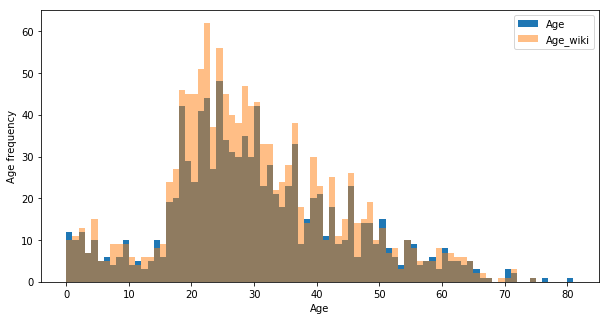

In [17]:
plt.figure(figsize=(10, 5))
h1 = plt.hist(titanic_all.Age.dropna(), bins=age_range, range=(0, age_range), label='Age')
h2 = plt.hist(titanic_all.Age_wiki.dropna(), bins=age_range, range=(0, age_range), alpha=0.5, label='Age_wiki')
plt.legend()
plt.ylabel('Age frequency')
plt.xlabel('Age')

In [18]:
print('Age length: {}'.format(len(titanic_all.Age.dropna())))
print('Age_wiki length: {}'.format(len(titanic_all.Age_wiki.dropna())))
titanic_all[titanic_all.Age != titanic_all.Age_wiki]

Age length: 1046
Age_wiki length: 1302


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,S,35.0,"Bonnell, Miss Elizabeth",61.0,"Youngstown, Ohio, US",Southampton,"Youngstown, Ohio, US",8,NaN,1.0
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,...,S,1196.0,"Saundercock, Mr. William Henry",19.0,"St Austell, Cornwall, England",Southampton,New York City,NaN,NaN,3.0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,...,S,446.0,"Hewlett, Mrs. Mary Dunbar (née Kingcome)",56.0,"Lucknow, British India, UK[note 3]",Southampton,"Rapid City, South Dakota, US",13,NaN,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,...,S,604.0,"Williams, Mr. Charles Eugene",23.0,"Harrow, London, England",Southampton,"Chicago, Illinois, US",14,NaN,2.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,...,C,1053.0,"Muslamani, Mrs. Fatimah",22.0,"Tebnine, Lebanon",Cherbourg,"Michigan City, Indiana, US",C,NaN,3.0
22,23,1.0,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,...,Q,1014.0,"McGowan, Miss Anna F. ""Annie""",16.0,"Massbrook, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",13,NaN,3.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,...,C,1205.0,"Shihab, Mr. Amir Faris",25.0,"Hadath, Lebanon",Cherbourg,New York City,NaN,NaN,3.0


We will use Age_wiki since is more complete

## Tickets

In [19]:
len(titanic_all.Ticket.unique())

929

In [20]:
ticket_freq = titanic_all.groupby('Ticket').size().sort_values(ascending=False)
ticket_freq

Ticket
CA. 2343             11
1601                  8
CA 2144               8
S.O.C. 14879          7
PC 17608              7
347082                7
347077                7
3101295               7
382652                6
19950                 6
347088                6
113781                6
4133                  5
PC 17757              5
113503                5
W./C. 6608            5
16966                 5
220845                5
349909                5
C.A. 34651            4
C.A. 33112            4
113760                4
SC/Paris 2123         4
2666                  4
C.A. 2315             4
36928                 4
W./C. 6607            4
PC 17483              4
LINE                  4
230136                4
                     ..
349223                1
349222                1
349221                1
349220                1
349219                1
349241                1
349242                1
349243                1
349255                1
350035                1
350034   

In [21]:
len(titanic_all.Fare.unique())

282

In [22]:
fare_freq = titanic_all.groupby('Fare').size().sort_values(ascending=False)
fare_freq

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
8.6625     21
7.2250     21
7.8542     21
7.2500     18
0.0000     17
21.0000    14
9.5000     12
16.1000    12
69.5500    11
27.7208    11
14.5000    11
7.7958     10
14.4542    10
7.8792     10
15.5000    10
24.1500     9
15.2458     9
7.0500      9
46.9000     8
56.4958     8
           ..
12.7375     1
15.0500     1
28.7125     1
42.5000     1
15.0333     1
13.7917     1
15.0000     1
9.6875      1
9.4833      1
9.4750      1
8.4042      1
7.8750      1
27.4458     1
32.3208     1
8.0292      1
14.0000     1
8.1583      1
8.3000      1
8.3625      1
8.4333      1
31.6792     1
8.4583      1
8.6542      1
8.6833      1
8.8500      1
8.9625      1
9.2167      1
31.6833     1
9.3250      1
9.8375      1
Length: 281, dtype: int64

## Class

In [23]:
print('Pclass len = {}'.format(len(titanic_all.Pclass.dropna())))
print('Class len = {}'.format(len(titanic_all.Class.dropna())))

Pclass len = 1309
Class len = 1304


In [24]:
titanic_class = titanic_all[['Pclass', 'Class']]
titanic_class[titanic_class.Pclass != titanic_class.Class]

,Pclass,Class
181,2,1.0
345,2,1.0
347,3,NaN
557,1,NaN
969,2,1.0
1000,2,1.0
1041,1,NaN
1048,3,NaN
1228,3,NaN
1296,2,1.0


We will use Pclass since it has fewer missing values

## Dataset with analysis features

In [25]:
titanic = titanic_all[['Survived', 'Pclass', 'Sex', 'Age_wiki', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Hometown', 'Destination']]

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Survived       891 non-null float64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age_wiki       1302 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Hometown       1304 non-null object
Destination    1304 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 122.8+ KB


In [27]:
print('1st class: total -> {} / with cabin -> {}'.format(len(titanic[titanic['Pclass'] == 1]), len(titanic[titanic['Pclass'] == 1].dropna())))
print('2nd class: total -> {} / with cabin -> {}'.format(len(titanic[titanic['Pclass'] == 2]), len(titanic[titanic['Pclass'] == 2].dropna())))
print('3rd class: total -> {} / with cabin -> {}'.format(len(titanic[titanic['Pclass'] == 3]), len(titanic[titanic['Pclass'] == 3].dropna())))

1st class: total -> 323 / with cabin -> 174
2nd class: total -> 277 / with cabin -> 16
3rd class: total -> 709 / with cabin -> 12


We drop cabin for now, too many people does not have a cabin number, and also ticket (fare is the interesting feature)

In [28]:
titanic = titanic_all[['Survived', 'Pclass', 'Sex', 'Age_wiki', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Hometown', 'Destination']]

In [29]:
titanic[titanic['Hometown'].isnull()]

,Survived,Pclass,Sex,Age_wiki,SibSp,Parch,Fare,Embarked,Hometown,Destination
347,1.0,3,female,NaN,1,0,16.1000,S,NaN,NaN
557,0.0,1,male,NaN,0,0,227.5250,C,NaN,NaN
1041,NaN,1,female,NaN,0,1,83.1583,C,NaN,NaN
1048,NaN,3,female,NaN,0,0,7.8542,S,NaN,NaN
1228,NaN,3,male,NaN,0,2,7.2292,C,NaN,NaN


In [30]:
titanic = titanic[~(titanic['Hometown'].isnull())]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1308
Data columns (total 10 columns):
Survived       889 non-null float64
Pclass         1304 non-null int64
Sex            1304 non-null object
Age_wiki       1302 non-null float64
SibSp          1304 non-null int64
Parch          1304 non-null int64
Fare           1303 non-null float64
Embarked       1302 non-null object
Hometown       1304 non-null object
Destination    1304 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 112.1+ KB


In [31]:
titanic[titanic['Fare'].isnull()]

,Survived,Pclass,Sex,Age_wiki,SibSp,Parch,Fare,Embarked,Hometown,Destination
1043,NaN,3,male,51.0,0,0,NaN,S,"Liverpool, Merseyside, England,",New York City


In [32]:
titanic = titanic[~(titanic['Fare'].isnull())]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1308
Data columns (total 10 columns):
Survived       889 non-null float64
Pclass         1303 non-null int64
Sex            1303 non-null object
Age_wiki       1301 non-null float64
SibSp          1303 non-null int64
Parch          1303 non-null int64
Fare           1303 non-null float64
Embarked       1301 non-null object
Hometown       1303 non-null object
Destination    1303 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 112.0+ KB


In [33]:
titanic.reset_index(inplace=True, drop=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
Survived       889 non-null float64
Pclass         1303 non-null int64
Sex            1303 non-null object
Age_wiki       1301 non-null float64
SibSp          1303 non-null int64
Parch          1303 non-null int64
Fare           1303 non-null float64
Embarked       1301 non-null object
Hometown       1303 non-null object
Destination    1303 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 101.9+ KB


In [34]:
titanic.dtypes.reset_index()

,index,0
0,Survived,float64
1,Pclass,int64
2,Sex,object
3,Age_wiki,float64
4,SibSp,int64
5,Parch,int64
6,Fare,float64
7,Embarked,object
8,Hometown,object
9,Destination,object


In [35]:
def replaceObjWithNum(col):
    unique_vals = titanic[col].dropna().unique()
    repDict = dict(zip(unique_vals, range(len(unique_vals))))
    print('Dictionary for {}: {}'.format(col, repDict))
    titanic.replace({col: repDict}, inplace=True)

In [36]:
replaceObjWithNum('Sex')
replaceObjWithNum('Embarked')

Dictionary for Sex: {'male': 0, 'female': 1}
Dictionary for Embarked: {'S': 0, 'C': 1, 'Q': 2}


In [75]:
hometown_dict = {'Bridgerule, Devon, England': 'England',
'New York, New York, US': 'US',
'Jyväskylä, Finland': 'Finland',
'Scituate, Massachusetts, US': 'US',
'Birmingham, West Midlands, England': 'England',
'Cork, Ireland': 'Ireland',
'Dorchester, Massachusetts, US': 'US',
'Bjuv, Skåne, Sweden': 'Sweden',
'St. Charles, Illinois, US': 'US',
'Zahlé, Lebanon, Ottoman Empire': 'Lebanon',
'Motala, Östergötland, Sweden': 'Sweden',
'Youngstown, Ohio, US': 'US',
'St Austell, Cornwall, England': 'England',
'Kisa, Östergötland, Sweden': 'Sweden',
'Salmunds, Gotland, Sweden': 'Sweden',
'Lucknow, British India, UK[note 3]': 'India',
'Athlone, Westmeath, Ireland': 'Ireland',
'Harrow, London, England': 'England',
'Pittem, Belgium': 'Belgium',
'Tebnine, Lebanon': 'Lebanon',
'Liverpool, Merseyside, England, UK': 'England',
'London, England, UK': 'England',
'Massbrook, Mayo, Ireland': 'Ireland',
'New Britain, Connecticut, US': 'US',
'Alseda, Småland, Sweden': 'Sweden',
'Hadath, Lebanon': 'Lebanon',
'Winnipeg, Manitoba, Canada': 'Canada',
'Limerick, Limerick, Ireland': 'Ireland',
'Unknown, Bulgaria': 'Bulgaria',
'Mexico City, Mexico': 'Mexico',
'Killaloe, Clare, Ireland': 'Ireland',
'Guernsey, Channel Islands': 'Channel Islands',
'Tripoli, Lebanon': 'Lebanon',
'Penwithick, Cornwall, England': 'England',
'Zwevezele, Belgium': 'Belgium',
'El-Hakour, Lebanon': 'Lebanon',
'Göteborg, Västergötland, Sweden': 'Sweden',
'Plymouth, Devon, England': 'England',
'Vetren, Bulgaria': 'Bulgaria',
'Paris, France': 'France',
'Kilmacowen, Sligo, Ireland': 'Ireland',
'Pontardawe, West Glamorgan, Wales': 'Wales',
'Ballymahon, Longford, Ireland': 'Ireland',
'Ballydehob, Cork, Ireland': 'Ireland',
'Hardîne, Lebanon': 'Lebanon',
'Altdorf, Uri, Switzerland': 'Switzerland',
'Ylihärmä, South Ostrobothnia, Finland': 'Finland',
'Newton Abbot, Devon, England': 'England',
'Manchester, England': 'England',
'Providence, Rhode Island, US': 'US',
'Kafr Mishki, Lebanon': 'Lebanon',
'Bournemouth, Dorset, England': 'England',
'Fulham, England': 'England',
'Kiğı, Turkey': 'Turkey',
'Hällekis, Västergötland, Sweden': 'Sweden',
'Cincinnati, Ohio, US': 'US',
'East Orange, New Jersey, US': 'US',
'Bristol, Avon, England': 'England',
'Kullaa, Finland': 'Finland',
'Zürich, Switzerland': 'Switzerland',
'St. Ives, Cornwall, England': 'England',
'Fritham, Hampshire, England': 'England',
'Agios Sostis, Peloponnese, Greece': 'Greece',
'Hong Kong, China': 'China',
'Bergen, Norway': 'Norway',
'Debnevo, Troyan, Bulgaria': 'Bulgaria',
'London, England': 'England',
'Bangkok, Siam': 'Siam',
'New York City, New York, US': 'US',
'Ruiselede, West Flanders, Belgium': 'Belgium',
'Haaltert, East Flanders, Belgium': 'Belgium',
'Lahardane, Mayo, Ireland': 'Ireland',
'Montevideo, Uruguay': 'Uruguay',
'Jersey, Channel Islands': 'Channel Islands',
'Kotka, Finland': 'Finland',
'Rotherfield, East Sussex, England': 'England',
'Milan[83], Italy': 'Italy',
'Kalfsnäs, Småland, Sweden': 'Sweden',
'Amenia, North Dakota, US': 'US',
'Bartley Farm, Hampshire, England': 'England',
'Heron\'s Ghyll, East Sussex, England': 'England',
'Southampton, Hampshire, England, UK': 'England',
'Vitebsk, Russian Empire': 'Russia',
'Vagovina, Croatia': 'Croatia',
'Belish, Troyan, Bulgaria': 'Bulgaria',
'Brunswick, Maine, US': 'US',
'Bäckebo, Småland, Sweden': 'Sweden',
'Ruotsinpyhtää, Finland': 'Finland',
'Gumostnik, Lovec, Bulgaria': 'Bulgaria',
'Ålesund, Møre og Romsdal, Norway': 'Norway',
'Bosanska Krupa, Bosnia': 'Bosnia',
'Askeaton, Limerick, Ireland': 'Ireland',
'Worcester, Massachusetts, US': 'US',
'Unknown, Syria': 'Syria',
'Cambridge, Cambridgeshire, England': 'England',
'Paavola, Northern Ostrobothnia, Finland': 'Finland',
'Beirut, Lebanon': 'Lebanon',
'Heinola, Finland': 'Finland',
'Charleville, Cork, Ireland': 'Ireland',
'Montreal, Quebec, Canada': 'Canada',
'Kingston upon Thames, London, England': 'England',
'Zahlé, Lebanon, Ottoman Empire[note 7]': 'Lebanon',
'Bude, Cornwall, England': 'England',
'Craghbrien, Clare, Ireland': 'Ireland',
'Trondheim, Norway': 'Norway',
'Sar\'al, Syria[81]': 'Syria',
'Effington Rut, South Dakota, US': 'US',
'Hrastelnica, Croatia': 'Croatia',
'Funchal, Madeira Islands, Portugal': 'Portugal',
'Bromsgrove, Worcestershire, England': 'England',
'Porthallow, Cornwall, England': 'England',
'Hedesunda, Gävleborg, Sweden': 'Sweden',
'Unknown, Lebanon': 'Lebanon',
'Helsinki, Finland': 'Finland',
'Glanmire, Cork, Ireland': 'Ireland',
'San Ambrosio, Córdoba, Argentina': 'Argentina',
'Malmö, Skåne, Sweden': 'Sweden',
'Nice, France': 'France',
'Jacksonville, Florida, US': 'US',
'Isleworth, London, England, UK': 'England',
'Sunnhordland, Norway': 'Norway',
'Geneva, Switzerland': 'Switzerland',
'Esker, Longford, Ireland': 'Ireland',
'Pisac, Croatia': 'Croatia',
'Peterborough, Cambridgeshire, England': 'England',
'Aberdeen, Aberdeenshire, Scotland': 'Scotland',
'Fridhemsberg, Halland, Sweden': 'Sweden',
'Brezik, Croatia': 'Croatia',
'Strood, Kent, England': 'England',
'St Leonards-on-Sea, East Sussex, England, UK': 'England',
'Brooklyn, New York, US': 'US',
'Mountain Home, Idaho, US': 'US',
'Grimshut, Småland, Sweden': 'Sweden',
'Liévin, Pas-de-Calais, France': 'France',
'Chicago, Illinois, US': 'US',
'Auburn, New York, US': 'US',
'Guntur, Madras Province, British India': 'India',
'Seattle, Washington, US': 'US',
'Pallasgreen, Limerick, Ireland': 'Ireland',
'Carrowskehine, Mayo, Ireland': 'Ireland',
'Bratina, Croatia': 'Croatia',
'Eskilstrup, Denmark': 'Denmark',
'Denver, Colorado, US': 'US',
'Ballywilliam, Wexford, Ireland': 'Ireland',
'Westrozebeke, Belgium': 'Belgium',
'Munsala, Finland': 'Finland',
'Indiana Harbor, Indiana, US': 'US',
'Fredericksburg, Virginia, US': 'US',
'Corglass, Longford, Ireland': 'Ireland',
'Glen Ridge, New Jersey, US': 'US',
'Buenos Aires, Argentina': 'Argentina',
'Holsworthy, Devon, England': 'England',
'Kølsen, Vorde Sogn, Denmark': 'Denmark',
'Aughnacliffe, Longford, Ireland': 'Ireland',
'Lexington, Massachusetts, US': 'US',
'Saarijärvi, Finland': 'Finland',
'Philadelphia, Pennsylvania, US': 'US',
'Lake Arthur, New Mexico, US': 'US',
'Dorking, Surrey, England': 'England',
'Firtby, Finland': 'Finland',
'Chelsea, London, England': 'England',
'Northlew, Devon, England': 'England',
'Oslo, Norway': 'Norway',
'Nyköping, Södermanland, Sweden': 'Sweden',
'Hjo, Västergötland, Sweden': 'Sweden',
'Thornton Heath, London, England': 'England',
'Porthoustock, Cornwall, England': 'England',
'Bishopstoke, Hampshire, England': 'England',
'Gunnislake, Cornwall, England': 'England',
'Aghnacliffe, Longford, Ireland': 'Ireland',
'Kauhajoki, Finland': 'Finland',
'Ottawa, Ontario, Canada': 'Canada',
'Fond du Lac, Wisconsin, US': 'US',
'Stockholm, Sweden': 'Sweden',
'Detroit, Michigan, US': 'US',
'Penarth, Glamorgan, Wales': 'Wales',
'Scranton, Pennsylvania, US': 'US',
'Suistamo, Finland': 'Finland',
'Tibnin, Lebanon': 'Lebanon',
'Germantown, Pennsylvania, US': 'US',
'Woodford County, Kentucky, US': 'US',
'Caltra, Galway, Ireland': 'Ireland',
'Wallasey, Merseyside, England, UK': 'England',
'Clonown, Roscommon, Ireland': 'Ireland',
'Slinfold, West Sussex, England': 'England',
'Stockholm, Uppland, Sweden': 'Sweden',
'Greenwich, Connecticut, US': 'US',
'Bryn Mawr, Pennsylvania, US': 'US',
'Sundbyberg, Sweden': 'Sweden',
'Wimbledon, London, England': 'England',
'Athenry, Galway, Ireland': 'Ireland',
'Hudson, New York, US': 'US',
'Belfast, Ireland': 'Ireland',
'East Providence, Rhode Island, US': 'US',
'Bunmahon, Waterford, Ireland': 'Ireland',
'Eslöv, Skåne, Sweden': 'Sweden',
'Heldergem, Haaltert, East Flanders, Belgium': 'Belgium',
'Liss, Hampshire, England': 'England',
'Streatham, London, England, UK': 'England',
'Galdovo, Croatia': 'Croatia',
'Aspelare, East Flanders, Belgium': 'Belgium',
'Gumostnik, Lovech, Bulgaria': 'Bulgaria',
'Tokyo, Japan': 'Japan',
'Cortrasna, Cavan, Ireland': 'Ireland',
'Dowagiac, Michigan, US': 'US',
'Kfar Mechi, Syria': 'Syria',
'Manchester, England, UK': 'England',
'Cuilmullagh, Mayo, Ireland': 'Ireland',
'Carrickatane, Tyrone, Ireland': 'Ireland',
'Hawthorne, New Jersey, US': 'US',
'Castleconnell, Limerick, Ireland[note 1]': 'Ireland',
'Guernsey, Channel Islands, Channel Islands': 'Channel Islands',
'Haverford, Pennsylvania, US': 'US',
'Madrid, Spain': 'Spain',
'Cooperstown, New York, US': 'US',
'Minneapolis, Minnesota, US': 'US',
'Ilford, Essex, England': 'England',
'Ramkvilla, Småland, Sweden': 'Sweden',
'Frankfort, Kentucky, US': 'US',
'Tuxedo Park, New York, US': 'US',
'Week St Mary, Cornwall, England': 'England',
'Halifax, Nova Scotia, Canada': 'Canada',
'Øyer, Norway': 'Norway',
'Tolworth, London, England, UK': 'England',
'Adelaide, South Australia, Australia': 'Australia',
'Trenton, New Jersey, US': 'US',
'Helsinki, Finland, Russian Empire[note 6]': 'Finland',
'Liverpool, Merseyside, England': 'England',
'Rochester, New York, US': 'US',
'Basingstoke, Hampshire, England': 'England',
'Ostrovica, Croatia': 'Croatia',
'Örsjö, Kalmar, Sweden': 'Sweden',
'Tebnin, Lebanon': 'Lebanon',
'Haaltert, Belgium': 'Belgium',
'Janjgir-Champa, British India, UK[note 3]': 'India',
'Corlough, Cavan, Ireland': 'Ireland',
'Currafarry, Galway, Ireland': 'Ireland',
'Montecarlo, Lucca, Tuscany, Italy': 'Italy',
'Asarum, Småland, Sweden': 'Sweden',
'Portland, Oregon, US': 'US',
'Vaasa, Finland': 'Finland',
'Fillingham, Lincolnshire, England': 'England',
'Karlshamn, Blekinge, Sweden': 'Sweden',
'Zgharta, Lebanon': 'Lebanon',
'Myren, Synnerby, Västergötland, Sweden': 'Sweden',
'Pielavesi, Finland': 'Finland',
'Lyndhurst, Hampshire, England': 'England',
'Sittingbourne, Kent, England': 'England',
'Mohill, Leitrim, Ireland': 'Ireland',
'Lotzwil, Switzerland': 'Switzerland',
'Örebro, Sweden': 'Sweden',
'Frostensmåla, Småland, Sweden': 'Sweden',
'Södra Brantevik, Sweden': 'Sweden',
'Hamilton, Ontario, Canada': 'Canada',
'Columbus, Ohio, US': 'US',
'Kivijärvi, Finland': 'Finland',
'Konjsko Brdo, Croatia': 'Croatia',
'Harrowbarrow, Cornwall, England': 'England',
'Algutsrum, Kalmar, Sweden': 'Sweden',
'Penzance, Cornwall, England': 'England',
'Bremnes, Norway': 'Norway',
'Ballysadare, Sligo, Ireland': 'Ireland',
'Greenport, New York, US': 'US',
'Tornio, Finland, Russian Empire[note 6]': 'Finland',
'Kerksken, Belgium': 'Belgium',
'Ballinalee, Longford, Ireland': 'Ireland',
'Todtmoos, Germany': 'Germany',
'Netley Abbey, Hampshire, England': 'England',
'Birmingham, Worcester, England': 'England',
'Cuilkillew, Mayo, Ireland': 'Ireland',
'Warsaw, Poland': 'Poland',
'Maidstone, Kent, England': 'England',
'Weston-super-Mare, North Somerset, England': 'England',
'Duluth, Minnesota, US': 'US',
'Trollhättan, Västergötland, Sweden': 'Sweden',
'Västermo, Södermanland, Sweden': 'Sweden',
'Marbella, Spain': 'Spain',
'Avaldsnes, Stavanger, Norway': 'Norway',
'San Francisco, California, US': 'US',
'Ḑuhūr ash Shuwayr, Lebanon': 'Lebanon',
'Toronto, Ontario, Canada': 'Canada',
'Skaare, Haugesund, Norway': 'Norway',
'Topolovac, Croatia': 'Croatia',
'East Bridgewater, Massachusetts, US': 'US',
'Pittsburgh, Pennsylvania, US': 'US',
'Indianapolis, Indiana, US': 'US',
'Boherbue, Cork, Ireland': 'Ireland',
'Petworth, West Sussex, England': 'England',
'St Annes-on-Sea, Lancashire, England, UK': 'England',
'Odense, Denmark': 'Denmark',
'Calheta, Madeira, Portugal': 'Portugal',
'Kildale, North Yorkshire, England, UK': 'England',
'Rathkeale, Limerick, Ireland': 'Ireland',
'Rahway, New Jersey, US': 'US',
'Široka Kula, Croatia': 'Croatia',
'New York City': 'US',
'Turku, Finland': 'Finland',
'Stoughton, Massachusetts, US': 'US',
'Elizabeth, New Jersey, US': 'US',
'Taalintehdas, Finland': 'Finland',
'Belfast, Northern Ireland, UK': 'Northern Ireland',
'Jalasjärvi, Southern Ostrobothnia, Finland': 'Finland',
'Buffalo, New York, US': 'US',
'Greatfield, Cheltenham, England': 'England',
'Cape Town, South Africa': 'South Africa',
'Swanage, England': 'England',
'Brookline, Massachusetts, US': 'US',
'Björkeberga, Skåne, Sweden': 'Sweden',
'Tonacrick, Clare, Ireland': 'Ireland',
'Glenduff, Kerry, Ireland': 'Ireland',
'Vancouver, British Columbia, Canada': 'Canada',
'Los Angeles, California, US': 'US',
'San Francisco, US': 'US',
'Warwick, Warwickshire, England': 'England',
'Jesenice, Slovenia': 'Slovenia',
'Shana, Lebanon': 'Lebanon',
'Killoe, Longford, Ireland': 'Ireland',
'Aberdeen, Washington, US': 'US',
'Akron, Ohio, US': 'US',
'Sar\'al, Syria': 'Syria',
'Washington, DC, US': 'US',
'Deal, Kent, England': 'England',
'Milwaukee, Wisconsin, US': 'US',
'Shanklin, Isle of Wight, England, UK': 'England',
'Norwich, Norfolk, England': 'England',
'Barcelona, Catalonia, Spain': 'Spain',
'St. Ives, Cornwall, England, UK': 'England',
'Drimoleague, Cork, Ireland': 'Ireland',
'Toula, Lebanon': 'Lebanon',
'Mariestad, Västergötland, Sweden': 'Sweden',
'Tampico, Montana, US': 'US',
'Rathfriland, Down, Ireland': 'Ireland',
'Glasgow, Scotland': 'Scotland',
'Leigh, Kent, England': 'England',
'Eastbourne, East Sussex, England': 'England',
'West Bromwich, Staffordshire, England': 'England',
'Castlepollard, Westmeath, Ireland': 'Ireland',
'Wollaston, Northamptonshire, England': 'England',
'Elimäki, Finland': 'Finland',
'Unknown, Unknown': 'Unknown',
'Stoneygate, Leicestershire, England': 'England',
'Abercynon, Glamorgan, Wales': 'Wales',
'Kyyny, Finland': 'Finland',
'Taunton, Somerset, England': 'England',
'Liskeard, Cornwall, England': 'England',
'Millwood, England': 'England',
'Unknown, Germany': 'Germany',
'Helsingborg, Skåne, Sweden': 'Sweden',
'Fostragh, Longford, Ireland': 'Ireland',
'Unknown, Ireland': 'Ireland',
'Broomfield, Essex, England': 'England',
'Yeovil, Somerset, England': 'England',
'Boston, Massachusetts, US': 'US',
'Copenhagen, Denmark': 'Denmark',
'Treherbert, Glamorgan, Wales': 'Wales',
'Haddonfield, New Jersey, US': 'US',
'Kingwilliamstown, Cork, Ireland': 'Ireland',
'Hessle, East Yorkshire, England, UK': 'England',
'Fyrnan, Småland, Sweden': 'Sweden',
'Basel, Switzerland': 'Switzerland',
'Belfast, Ireland, UK': 'Ireland',
'Valitaipale, Finland': 'Finland',
'Kricina, Croatia': 'Croatia',
'Market Drayton, Shropshire, England': 'England',
'Wallingford, Oxfordshire, England': 'England',
'Etnesjøen, Hordaland Fylke, Norway': 'Norway',
'Whitechurch, Cork, Ireland': 'Ireland',
'Dublin, Ireland, UK[note 1]': 'Ireland',
'Southsea, Hampshire, England': 'England',
'Hogstad, Norway': 'Norway',
'Unknown (Estonia?), Russia (Estonia?)': 'Russia',
'Cape Town, South Africa, UK': 'South Africa',
'Tofta, Uppland, Sweden': 'Sweden',
'Oulainen, Oulu, Finland': 'Finland',
'Cahir, Tipperary, Ireland': 'Ireland',
'Cairo, Egypt': 'Egypt',
'Vikersund, Norway': 'Norway',
'Cape Town, South Africa, UK[note 4]': 'South Africa',
'Gornji Miholjac, Croatia': 'Croatia',
'St Louis, Missouri, US': 'US',
'Calgary, Alberta, Canada': 'Canada',
'Milje, Slovenia': 'Slovenia',
'Bronx, New York, US': 'US',
'Leixlip, Kildare, Ireland': 'Ireland',
'Borgund, Møre og Romsdal, Norway': 'Norway',
'Holeby, Storstrøm, Denmark': 'Denmark',
'Brussels, Belgium': 'Belgium',
'Stamford, Connecticut, US': 'US',
'Bath, Somerset, England': 'England',
'Dublin, Ireland': 'Ireland',
'Abbeyleix, Laois, Ireland[note 1]': 'Ireland',
'Southampton, Hampshire, England': 'England',
'Skara, Västergötland, Sweden': 'Sweden',
'Tonypandy, Glamorgan, Wales': 'Wales',
'Malka Ribnya, Troyan, Bulgaria': 'Bulgaria',
'Kingston, Surrey, England, UK': 'England',
'Convoy, Donegal, Ireland, England': 'England',
'Muljula, Kitee, Finland': 'Finland',
'Turku, Finland, Russian Empire[note 6]': 'Finland',
'Heamoor, Cornwall, England': 'England',
'Unknown, Russia': 'Russia',
'Denderhoutem, Belgium': 'Belgium',
'Dagsås, Halland, Sweden': 'Sweden',
'Kårberg, Örebro, Sweden': 'Sweden',
'Carrowkehine, Mayo, Ireland': 'Ireland',
'Bokn, Norway': 'Norway',
'Kristinehamn, Värmland, Sweden': 'Sweden',
'Springfield, Massachusetts, US': 'US',
'Terziysko, Troyan, Bulgaria': 'Bulgaria',
'Middleburg Heights, Ohio, US': 'US',
'St. Paul, Minnesota, US': 'US',
'Great Yarmouth, Norfolk, England': 'England',
'Landrake, Cornwall, England': 'England',
'Portage la Prairie, Manitoba, Canada': 'Canada',
'Rotterdam, The Netherlands': 'The Netherlands',
'Clonbur, Galway, Ireland': 'Ireland',
'Bayonne, New Jersey, US': 'US',
'Krakoryd, Småland, Sweden': 'Sweden',
'Southall, London, England': 'England',
'Lakewood, New Jersey, US': 'US',
'Streklevac, Slovenia': 'Slovenia',
'Salo, Finland': 'Finland',
'Huntingfield, Suffolk, England': 'England',
'Áyios Sóstis, Greece': 'Greece',
'Lipova Glavica, Croatia': 'Croatia',
'Reftele, Småland, Sweden': 'Sweden',
'Lima, Peru': 'Peru',
'Racine, Wisconsin, US': 'US',
'Porthleven, Cornwall, England': 'England',
'Clevedon, North Somerset England': 'England',
'El Shweir, Lebanon': 'Lebanon',
'Kokkola, Finland': 'Finland',
'Knezhni Lak, Troyan, Bulgaria': 'Bulgaria',
'Deer Lodge, Montana, US': 'US',
'Gudinė, Lithuania [76]': 'Lithuania',
'Patrickswell, Limerick, Ireland': 'Ireland',
'Fermoy, Ireland[note 1]': 'Ireland',
'Uster, Switzerland': 'Switzerland',
'Knäred, Halland, Sweden': 'Sweden',
'Bank Place, Tipperary, Ireland': 'Ireland',
'Bangkok, Siam[note 5]': 'Siam',
'Shwayhad, Syria': 'Syria',
'Bennington, Vermont, US': 'US',
'Swindon, Wiltshire, England': 'England',
'Limerick, Ireland[note 1]': 'Ireland',
'Ibrin[85], Syria or Lebanon': 'Lebanon',
'Pomeroy, Washington, US': 'US',
'Agios Sostis, Greece': 'Greece',
'Provo, Utah, US': 'US',
'Tynagh, Galway, Ireland': 'Ireland',
'Huntington, West Virginia, US': 'US',
'Perkins County, South Dakota, US': 'US',
'Podgora, Croatia': 'Croatia',
'Sydney, New South Wales, Australia': 'Australia',
'Albany, New York, US': 'US',
'Karinainen, Finland': 'Finland',
'Havana, Cuba': 'Cuba',
'Greenwich, London, England': 'England',
'Bree, Wexford, Ireland': 'Ireland',
'Ascot, Berkshire, England, UK': 'England',
'Unknown, Macedonia': 'Macedonia',
'Glencree, Ireland[note 1]': 'Ireland',
'Clevedon, North Somerset, England': 'England',
'Cum, Mayo, Ireland': 'Ireland',
'New Haven, Connecticut, US': 'US',
'Sandefjord, Norway': 'Norway',
'Antwerp, Belgium': 'Belgium',
'Ikaalinen, Pirkanmaa, Finland': 'Finland',
'Medeltorp, Småland, Sweden': 'Sweden',
'Newark, New Jersey, US': 'US',
'Donoughmore, Cork, Ireland': 'Ireland',
'Kvarnaryd, Småland, Sweden': 'Sweden',
'Ballinascreen, Tipperary, Ireland': 'Ireland',
'Cork, Cork, Ireland': 'Ireland',
'Ovens, Cork, Ireland': 'Ireland',
'Fergus, Ontario, Canada': 'Canada',
'Jersey City, New Jersey, US': 'US',
'Hamburg, German Empire[note 2]': 'Germany',
'Watergate, Limerick, Ireland': 'Ireland',
'Norrköping, Östergötland, Sweden': 'Sweden',
'Arboretum, Worcestershire, England': 'England',
'Mogilev, Belarus': 'Belarus',
'Jordanstorp, Södermanland, Sweden': 'Sweden',
'Brighton, Massachusetts, US': 'US',
'Roachdale, Indiana, US': 'US',
'Gabrovo, Bulgaria': 'Bulgaria',
'Saint Sampson, Guernsey, Channel Islands, England': 'Channel Islands',
'Kilcogy, Cavan, Ireland': 'Ireland',
'Scheyern, Bavaria, German Empire[note 2]': 'Germany',
'Omaha, Nebraska, US': 'US',
'Stora Tuna, Sweden': 'Sweden',
'Edinburgh, Scotland': 'Scotland',
'Guntur, Madras Province, British India[note 3]': 'India',
'Sarnia, Ontario, Canada': 'Canada',
'Ilfracombe, Devon, England': 'England',
'Barre, Vermont, US': 'US',
'Chelsea, Michigan, US': 'US',
'Lysvik, Värmland, Sweden': 'Sweden',
'Saint Peter Port, Guernsey, Channel Islands': 'Channel Islands',
'Haugesund, Rogaland, Norway': 'Norway',
'Redruth, Cornwall, England': 'England',
'Le Havre, France': 'France',
'Terry, Mayo, Ireland': 'Ireland',
'Bakić, Bosnia': 'Bosnia',
'Fritham, Hampshire, England, UK': 'England',
'Vadsbro, Sörmland, Sweden': 'Sweden',
'Chelsea, London, England, UK': 'England',
'Derrymartin, Mayo, Ireland': 'Ireland',
'Unknown, Scotland': 'Scotland',
'Oxford, Oxfordshire, England': 'England',
'Oskarshamn, Kalmar, Sweden': 'Sweden',
'Trien, Roscommon, Ireland': 'Ireland',
'Devonport, Devon, England': 'England',
'Östra Sallerup, Skåne, Sweden': 'Sweden',
'Joensuu, Finland, Russian Empire[note 6]': 'Finland',
'Dalsbruk, Finland': 'Finland',
'Genevad, Halland, Sweden': 'Sweden',
'Vienna, Austria': 'Austria',
'Currowhunane, Sligo, Ireland': 'Ireland',
'Västra Bogane, Orust Island, Sweden': 'Sweden',
'Krøkstad, Ski, Norway': 'Norway',
'Hörby, Skåne, Sweden': 'Sweden',
'Milford, New Hampshire, US': 'US',
'Portsmouth, Hampshire, England': 'England',
'North Walsham, Norfolk, England': 'England',
'Bukovac, Croatia': 'Croatia',
'Mullingar, Westmeath, Ireland': 'Ireland',
'Sir\'Al, Lebanon': 'Lebanon',
'Wellingborough, Northamptonshire, England': 'England',
'Bridgwater, Somerset, England': 'England',
'Lunna, Orust Island, Sweden': 'Sweden',
'Tipperary, Ireland': 'Ireland',
'Aclare, Sligo, Ireland': 'Ireland',
'Tavistock, Devon, England': 'England',
'Tågarp, Skåne, Sweden': 'Sweden',
'Hartford, Connecticut, US': 'US',
'Brockton, Massachusetts, US': 'US',
'Madeira, Portugal': 'Portugal',
'Guernsey, Channel Islands, UK': 'Channel Islands',
'Truro, Cornwall, England, UK': 'England',
'Simrishamn, Skåne, Sweden': 'Sweden',
'Sondmore, Norway': 'Norway',
'Orange, New Jersey, US': 'US',
'Maidenhead, Berkshire, England': 'England',
'Torquay, Devon, England, UK': 'England',
'Belmont, Massachusetts, US': 'US',
'Sandhurst, Kent, England': 'England',
'Waterford, Waterford, Ireland': 'Ireland',
'Toledo, Ohio, US': 'US',
'Birmingham, West Midlands, England, UK': 'England',
'Broadford, Limerick, Ireland': 'Ireland',
'Durban, South Africa': 'South Africa',
'Salisbury, Wiltshire, England': 'England',
'Horset, Småland, Sweden': 'Sweden',
'West Hoboken, New Jersey, US': 'US',
'Knockmaria, Mayo, Ireland': 'Ireland',
'Carleens, Cornwall, England': 'England',
'Kilkinlea, Limerick, Ireland': 'Ireland',
'Harrowbarrow, Cornwall, England, UK': 'England',
'Cologne, German Empire[note 2]': 'Germany',
'Glenlougha, Cork, Ireland': 'Ireland',
'Donoughmore, Ireland': 'Ireland',
'Skaun, Sør-Trøndelag, Norway': 'Norway',
'Sar\'al[81], Syria': 'Syria'}

In [76]:
titanic.replace({'Hometown': hometown_dict}, inplace=True)

In [66]:
destination_dict = {'Qu\'Appelle Valley, Saskatchewan, Canada': 'Canada',
'New York, New York, US': 'US',
'New York City': 'US',
'Scituate, Massachusetts, US': 'US',
'Dorchester, Massachusetts, US': 'US',
'Chicago, Illinois, US': 'US',
'St. Charles, Illinois, US': 'US',
'Cleveland, Ohio, US': 'US',
'San Francisco, US': 'US',
'Youngstown, Ohio, US': 'US',
'Winnipeg, Manitoba, Canada': 'Canada',
'Los Angeles, US': 'US',
'Rapid City, South Dakota, US': 'US',
'Spokane, Washington, US': 'US',
'Fremont, Ohio, US': 'US',
'Michigan City, Indiana, US': 'US',
'Montreal, Quebec, Canada': 'US',
'Toronto, Ontario, Canada': 'US',
'New Britain, Connecticut, US': 'US',
'Worcester, Massachusetts, US': 'US',
'Mexico City, Mexico': 'US',
'Washington, DC, US': 'US',
'Edgewood, Rhode Island, US': 'US',
'Philadelphia, Pennsylvania, US': 'US',
'Jacksonville, Florida, US': 'US',
'Akeley, Minnesota, US': 'US',
'Salt Lake City, Utah, US': 'US',
'Madison, Wisconsin, US': 'US',
'Cap-Haïtien, Haiti': 'Haiti',
'Jersey City, New Jersey, US': 'US',
'Wilkes-Barre, Pennsylvania, US': 'US',
'New Glarus, Wisconsin, US': 'US',
'Coal Center, Pennsylvania, US': 'US',
'Buffalo, New York, US': 'US',
'Providence, Rhode Island, US': 'US',
'Wilmington, Delaware, US': 'US',
'Ottawa, Ontario, Canada': 'Canada',
'Gainesville, Florida, US': 'US',
'Niagara Falls, New York, US': 'US',
'Brantford, Ontario, Canada': 'Canada',
'Iron Mountain, Michigan, US': 'US',
'Gallipolis, Ohio, US': 'US',
'Houtzdale, Pennsylvania, US': 'US',
'East Orange, New Jersey, US': 'US',
'Milwaukee, Wisconsin, US': 'US',
'Houghton, Michigan, US': 'US',
'Manitoba, Canada': 'US',
'Minneapolis, Minnesota, US': 'US',
'Roseville, Illinois, US': 'US',
'Stanton, Ohio, US': 'US',
'Detroit, Michigan, US': 'US',
'Montevideo, Uruguay': 'Uruguay',
'Atlanta, Georgia, US': 'US',
'Essex County, New Jersey, US': 'US',
'Amenia, North Dakota, US': 'US',
'Wichita, Kansas, US': 'US',
'Merrill, Wisconsin, US': 'US',
'New York, US': 'US',
'Bronx, New York, US': 'US',
'Harrisburg, Pennsylvania, US': 'US',
'Brunswick, Maine, US': 'US',
'Cheyenne, North Dakota, US': 'US',
'Proctor, Minnesota, US': 'US',
'Brooklyn, New York, US': 'US',
'The Pas, Manitoba, Canada': 'Canada',
'Hoboken, New Jersey, US': 'US',
'Hartford, Connecticut, US': 'US',
'Effington Rut, South Dakota, US': 'US',
'Yonkers, New York, US': 'US',
'Mitchell, South Dakota, US': 'US',
'Kent, British Columbia, Canada': 'Canada',
'Hackensack, New Jersey, US': 'US',
'Monessen, Pennsylvania, US': 'US',
'Charlestown, US': 'US',
'Trenton, New Jersey, US': 'US',
'North Wales, Pennsylvania, US': 'US',
'Broderick, Canada': 'Canada',
'Radnor, Pennsylvania, US': 'US',
'Newark, New Jersey, US': 'US',
'Portland, Oregon, US': 'US',
'Monee, Illinois, US': 'US',
'Sault Ste. Marie, Michigan, US': 'US',
'Mountain Home, Idaho, US': 'US',
'Long Island, New York, US': 'US',
'Mystic, Iowa, US': 'US',
'Auburn, New York, US': 'US',
'Benton Harbor, Michigan, US': 'US',
'Seattle, Washington, US': 'US',
'Denver, Colorado, US': 'US',
'Vancouver, British Columbia, Canada': 'Canada',
'Indiana Harbor, Indiana, US': 'US',
'Fredericksburg, Virginia, US': 'US',
'Glen Ridge, New Jersey, US': 'US',
'Mamaronek, New York, US': 'US',
'Saskatoon, Saskatchewan, Canada': 'Canada',
'San Francisco, California, US': 'US',
'Lexington, Massachusetts, US': 'US',
'Lake Arthur, New Mexico, US': 'US',
'Lead, South Dakota, US': 'US',
'Coon Rapids, Iowa, US': 'US',
'Stamford, Connecticut, US': 'US',
'Bayonne, New Jersey, US': 'US',
'Sault Ste Marie, Michigan, US': 'US',
'New London, Connecticut, US': 'US',
'Sacramento, California, US': 'US',
'Payette, Idaho, US': 'US',
'Butte, Montana, US': 'US',
'Sudbury, Ontario, Canada': 'Canada',
'Fond du Lac, Wisconsin, US': 'US',
'Saranac Lake, New York, US': 'US',
'Scranton, Pennsylvania, US': 'US',
'Astoria, Oregon, US': 'US',
'Dowagiac, Michigan, US': 'US',
'Germantown, Pennsylvania, US': 'US',
'Woodford County, Kentucky, US': 'US',
'Hammond, Indiana, US': 'US',
'Boston, Massachusetts, US': 'US',
'Indianapolis, Indiana, US': 'US',
'Greenwich, Connecticut, US': 'US',
'Bryn Mawr, Pennsylvania, US': 'US',
'Bennington, Vermont, US': 'US',
'Hudson, New York, US': 'US',
'Stratford, Connecticut, US': 'US',
'East Providence, Rhode Island, US': 'US',
'Morris Plains, New Jersey, US': 'US',
'Gladstone, Michigan, US': 'US',
'Oglesby, Illinois, US': 'US',
'Tokyo, Japan': 'Japan',
'Haverford, Pennsylvania, US': 'US',
'Cooperstown, New York, US': 'US',
'Joliet, Illinois, US': 'US',
'Frankfort, Kentucky, US': 'US',
'Tuxedo Park, New York, US': 'US',
'Grand Forks, North Dakota, US': 'US',
'Fingal, North Dakota, US': 'US',
'Ashtabula, Ohio, US': 'US',
'Minatitlán, Veracruz, Mexico': 'Mexico',
'Rochester, New York, US': 'US',
'Washington, DC US': 'US',
'Red Lodge, Montana, US': 'US',
'Peoria, Illinois, US': 'US',
'Bally, Pennsylvania, US': 'US',
'East Lynn, Massachusetts, US': 'US',
'Russell, US': 'US',
'Waterbury, Connecticut, US': 'US',
'Aberdeen, South Dakota, US': 'US',
'Tulsa, Oklahoma, US': 'US',
'Eden, Manitoba, Canada': 'Canada',
'Lakewood Township, New Jersey, US': 'US',
'Central City, Iowa, US': 'US',
'Swedeburg, Nebraska, US': 'US',
'St. Paul, Minnesota, US': 'US',
'Hamilton, Ontario, Canada': 'Canada',
'Columbus, Ohio, US': 'US',
'La Porte City, Iowa, US': 'US',
'Clear Creek, Colorado, US': 'US',
'Akron, Ohio, US': 'US',
'Cheyenne, Wyoming, US': 'US',
'Greenport, New York, US': 'US',
'La Salle, Illinois, US': 'US',
'Stanton, Iowa, US': 'US',
'Quebec City, Quebec, Canada': 'Canada',
'Clinton, New York, US': 'US',
'Duluth, Minnesota, US': 'US',
'Arlington, Virginia, US': 'US',
'Belmar, New Jersey, US': 'US',
'Galesburg, Illinois, US': 'US',
'East Bridgewater, Massachusetts, US': 'US',
'Pittsburgh, Pennsylvania, US': 'US',
'Oregon, Wisconsin, US': 'US',
'Rahway, New Jersey, US': 'US',
'Stoughton, Massachusetts': 'US',
'Elizabeth, New Jersey, US': 'US',
'Palmer, Massachusetts, US': 'US',
'Hibbing, Minnesota, US': 'US',
'Canastota, New York, US': 'US',
'Brookline, Massachusetts, US': 'US',
'Troy, New York, US': 'US',
'Los Angeles, California, US': 'US',
'St. Joseph, Minnesota, US': 'US',
'Marietta, Ohio, US': 'US',
'Aberdeen, Washington, US': 'US',
'Groesbeck, Texas, US': 'US',
'Havana, Cuba': 'Cuba',
'Dayton, Ohio, US': 'US',
'Halifax, Nova Scotia, Canada': 'Canada',
'Tampico, Montana, US': 'US',
'Gleichen, Alberta, Canada': 'Canada',
'Pontiac, Michigan, US': 'US',
'Huntley, Illinois, US': 'US',
'Kitchener, Ontario, Canada': 'Canada',
'Gurnee, Illinois, US': 'US',
'Bernardsville, New Jersey, US': 'US',
'Racine, Wisconsin, US': 'US',
'Haddonfield, New Jersey, US': 'US',
'Tuxford, Saskatchewan, Canada': 'Canada',
'Tottenville, New York, US': 'US',
'Great Falls, Montana, US': 'US',
'Schenectady, New York, US': 'US',
'New Haven, Connecticut, US': 'US',
'Story City, Iowa, US': 'US',
'Toledo, Ohio, US': 'US',
'Halley, Michigan, US': 'US',
'Carneron, US': 'US',
'St Louis, Missouri, US': 'US',
'Calgary, Alberta, Canada': 'Canada',
'Auburndale, Florida, US': 'US',
'Rockford, Illinois, US': 'US',
'Calumet, Michigan, US': 'US',
'Brighton, Boston, Massachusetts, US': 'US',
'Tower, Minnesota, US': 'US',
'Jerome Junction, Arizona, US': 'US',
'Portland, North Dakota, US': 'US',
'Owen Sound, Ontario, Canada': 'Canada',
'Springfield, Massachusetts, US': 'US',
'Olympia, Washington, US': 'US',
'Middleburg Heights, Ohio, US': 'US',
'Steelton, Pennsylvania, US': 'US',
'Wilkes Barre, Pennsylvania, US': 'US',
'Albion, Michigan, US': 'US',
'Nashua, New Hampshire, US': 'US',
'Des Moines, Iowa, US': 'US',
'Guttenberg, New Jersey, US': 'US',
'Bloomington, Indiana, US': 'US',
'Lakewood, New Jersey, US': 'US',
'Aurora, Illinois, US': 'US',
'Stamford, Connecticut US': 'US',
'Cincinnati, Ohio, US': 'US',
'Hanover, New Hampshire, US': 'US',
'Norfolk, Virginia, US': 'US',
'Lima, Peru': 'Peru',
'Camden, New Jersey, US': 'US',
'Waukegan, Illinois, US': 'US',
'Deer Lodge, Montana, US': 'US',
'Waban, Massachusetts, US': 'US',
'Beloit, Wisconsin, US': 'US',
'Beresford, South Dakota, US': 'US',
'Dobbs Ferry, New York, US': 'US',
'Greensburg, Pennsylvania, US': 'US',
'Idaho, US': 'US',
'Kulpmont, Pennsylvania, US': 'US',
'Pomeroy, Washington, US': 'US',
'Provo, Utah, US': 'US',
'Huntington, West Virginia, US': 'US',
'Perkins County, South Dakota, US': 'US',
'Bedford, Indiana, US': 'US',
'Glen Falls, New York, US': 'US',
'Albany, New York, US': 'US',
'Skaneateles, New York, US': 'US',
'Burlington, Iowa, US': 'US',
'Glassport, Pennsylvania, US': 'US',
'Roxbury, Massachusetts, US': 'US',
'Fergus, Ontario, Canada': 'Canada',
'Gloversville, New York, US': 'US',
'Brighton, Massachusetts, US': 'US',
'Roachdale, Indiana, US': 'US',
'Albion, New York, US': 'US',
'Cottage Grove, Oregon, US': 'US',
'St. Cloud, Minnesota, US': 'US',
'Omaha, Nebraska, US': 'US',
'Evanston, Illinois, US': 'US',
'Hancock, Michigan, US': 'US',
'Sarnia, Ontario, Canada': 'Canada',
'Moose Jaw, Saskatchewan, Canada': 'Canada',
'New Brighton, Pennsylvania, US': 'US',
'Barre, Vermont, US': 'US',
'Chelsea, Michigan, US': 'US',
'Missoula, Montana, US': 'US',
'Centerville, South Dakota, US': 'US',
'Port Byron, New York, US': 'US',
'Manistee, Michigan, US': 'US',
'Middletown, Connecticut, US': 'US',
'Red Wing, Minnesota, US': 'US',
'Patterson, New Jersey, US': 'US',
'Milford, New Hampshire, US': 'US',
'North Bergen, New Jersey, US': 'US',
'Elmira, New York, US': 'US',
'Manitowoc, Wisconsin, US': 'US',
'Brockton, Massachusetts, US': 'US',
'São Paulo, Brazil': 'Brazil',
'Orange, New Jersey, US': 'US',
'Mamaroneck, New York, US': 'US',
'Belmont, Massachusetts, US': 'US',
'Ontario, New York, US': 'US',
'Larchmont, New York, US': 'US',
'Asheville, North Carolina, US': 'US',
'West Hoboken, New Jersey, US': 'US',
'Milwaukee, Wisconsin': 'US',
'Sherbrooke, Quebec, Canada': 'Canada'}

In [67]:
titanic.replace({'Destination': destination_dict}, inplace=True)

In [88]:
ht_freq = titanic.groupby('Hometown').size().sort_values(ascending=False)
countries = ht_freq.index
country_freq = ht_freq.values
country_freq

array([316, 296, 122, 106,  65,  56,  41,  33,  32,  30,  27,  22,  17,
        13,  12,   9,   8,   8,   7,   7,   6,   6,   6,   6,   5,   5,
         5,   4,   4,   4,   3,   3,   2,   2,   2,   2,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1])

(-1, 47)

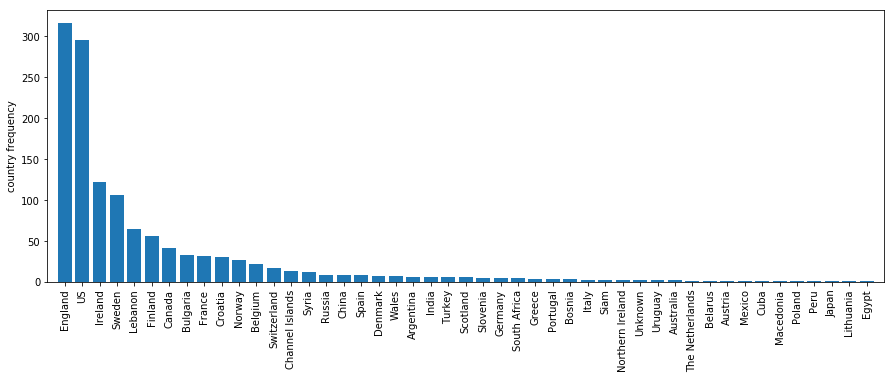

In [102]:
plt.figure(figsize=(15,5))
x = np.arange(0, len(country_freq))
plt.bar(x, country_freq)
plt.ylabel('country frequency')
plt.xticks(x, countries, rotation=90)
plt.xlim(-1, len(country_freq))

In [101]:
replaceObjWithNum('Hometown')

Dictionary for Hometown: {'England': 0, 'US': 1, 'Finland': 2, 'Ireland': 3, 'Sweden': 4, 'Lebanon': 5, 'India': 6, 'Belgium': 7, 'Canada': 8, 'Bulgaria': 9, 'Mexico': 10, 'Channel Islands': 11, 'France': 12, 'Wales': 13, 'Switzerland': 14, 'Turkey': 15, 'Greece': 16, 'China': 17, 'Norway': 18, 'Siam': 19, 'Uruguay': 20, 'Italy': 21, 'Russia': 22, 'Croatia': 23, 'Bosnia': 24, 'Syria': 25, 'Portugal': 26, 'Argentina': 27, 'Scotland': 28, 'Denmark': 29, 'Japan': 30, 'Spain': 31, 'Australia': 32, 'Germany': 33, 'Poland': 34, 'Northern Ireland': 35, 'South Africa': 36, 'Slovenia': 37, 'Unknown': 38, 'Egypt': 39, 'The Netherlands': 40, 'Peru': 41, 'Lithuania': 42, 'Cuba': 43, 'Macedonia': 44, 'Belarus': 45, 'Austria': 46}


In [103]:
titanic.describe()

,Survived,Pclass,Sex,Age_wiki,SibSp,Parch,Fare,Embarked,Hometown
count,889.000000,1303.000000,1303.000000,1301.000000,1303.000000,1303.000000,1303.000000,1301.000000,1303.000000
mean,0.383577,2.294705,0.355334,29.399239,0.500384,0.384497,33.160875,0.394312,5.719877
std,0.486531,0.837318,0.478798,13.751211,1.043504,0.865966,51.547057,0.654404,8.516125
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,2.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.275000,1.000000,7.000000
max,1.000000,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200,2.000000,46.000000


In [107]:
titanic.drop(columns=['Destination'], inplace=True)
titanic.head(3)

,Survived,Pclass,Sex,Age_wiki,SibSp,Parch,Fare,Embarked,Hometown
0,0.0,3,0,22.0,1,0,7.2500,0.0,0
1,1.0,1,1,35.0,1,0,71.2833,1.0,1
2,1.0,3,1,26.0,0,0,7.9250,0.0,2


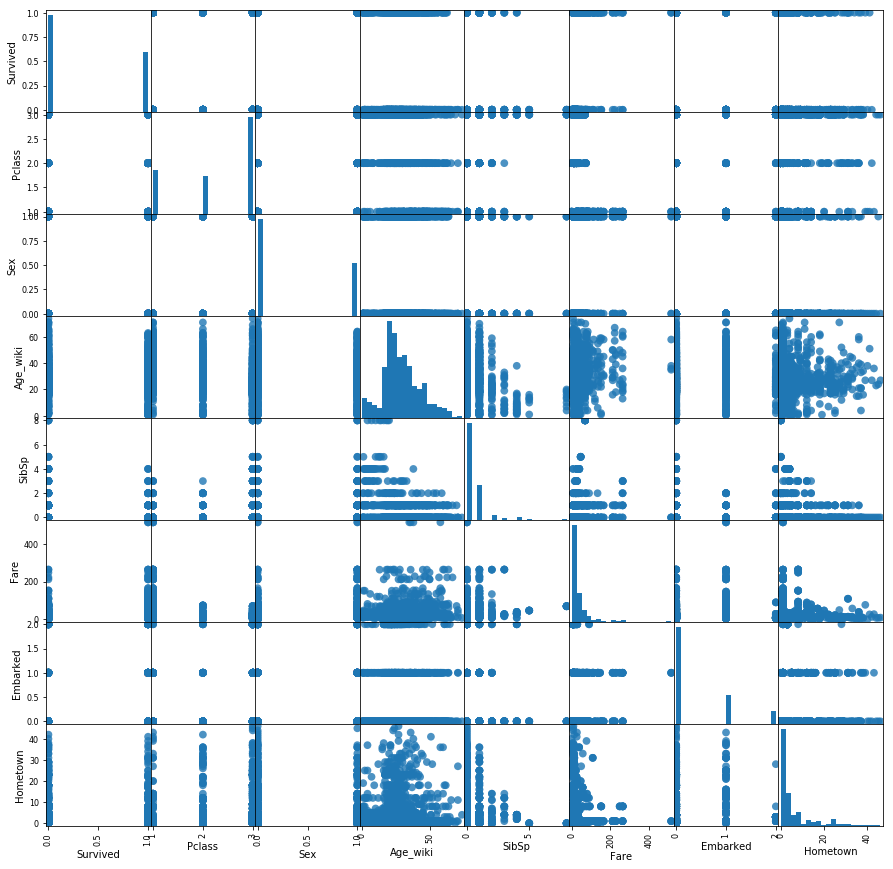

In [109]:
a = pd.plotting.scatter_matrix(titanic[['Survived', 'Pclass', 'Sex',
                                     'Age_wiki', 'SibSp', 'Fare', 'Embarked', 'Hometown']],
                           figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

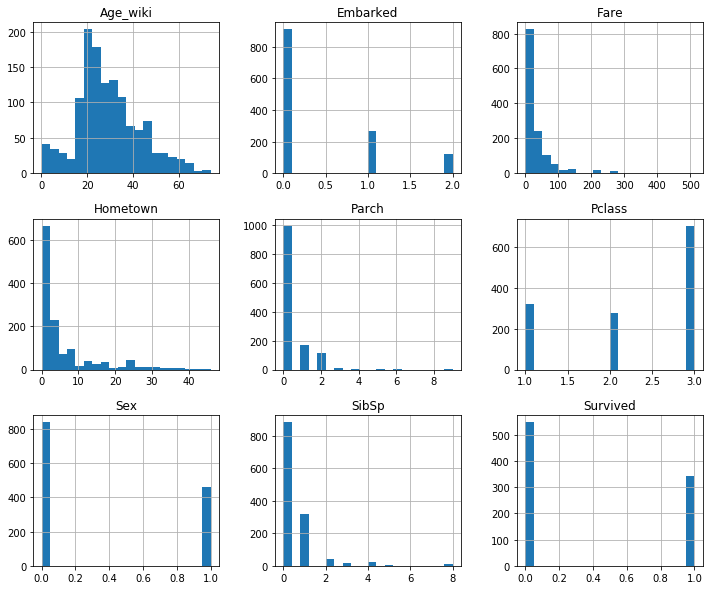

In [110]:
b = titanic.hist(bins=20, figsize=(12,10))

In [121]:
survived = len(titanic[titanic.Survived == 1.0])
not_survived = len(titanic[titanic.Survived == 0.0])
people_not_nan = len(titanic[~(titanic.Survived.isnull())])
print('Percentage of survived people: {:.2f}%'.format(survived / people_not_nan * 100))
print('Percentage of deceased people: {:.2f}%'.format(not_survived / people_not_nan * 100))

Percentage of survived people: 38.36%
Percentage of deceased people: 61.64%


In [125]:
surv_males = len(titanic[(titanic.Survived == 1.0) & (titanic.Sex == 0.0)])
surv_females = len(titanic[(titanic.Survived == 1.0) & (titanic.Sex == 1.0)])
dec_males = len(titanic[(titanic.Survived == 0.0) & (titanic.Sex == 0.0)])
dec_females = len(titanic[(titanic.Survived == 0.0) & (titanic.Sex == 1.0)])
print('Percentage of survived males: {:.2f}%'.format(surv_males / survived * 100))
print('Percentage of survived females: {:.2f}%'.format(surv_females / survived * 100))
print('Percentage of deceased males: {:.2f}%'.format(dec_males / not_survived * 100))
print('Percentage of deceased females: {:.2f}%'.format(dec_females / not_survived * 100))

Percentage of survived males: 31.96%
Percentage of survived females: 68.04%
Percentage of deceased males: 85.22%
Percentage of deceased females: 14.78%


In [126]:
minors_surv_males = len(titanic[(titanic.Survived == 1.0) & (titanic.Sex == 0.0) & (titanic.Age_wiki < 18.0)])
minors_surv_females = len(titanic[(titanic.Survived == 1.0) & (titanic.Sex == 1.0) & (titanic.Age_wiki < 18.0)])
minors_dec_males = len(titanic[(titanic.Survived == 0.0) & (titanic.Sex == 0.0) & (titanic.Age_wiki < 18.0)])
minors_dec_females = len(titanic[(titanic.Survived == 0.0) & (titanic.Sex == 1.0) & (titanic.Age_wiki < 18.0)])
print('Percentage of survived minor males: {:.2f}%'.format(minors_surv_males / surv_males * 100))
print('Percentage of survived minor females: {:.2f}%'.format(minors_surv_females / surv_females * 100))
print('Percentage of deceased minor males: {:.2f}%'.format(minors_dec_males / dec_males * 100))
print('Percentage of deceased minor females: {:.2f}%'.format(minors_dec_females / dec_females * 100))

Percentage of survived minor males: 22.02%
Percentage of survived minor females: 16.81%
Percentage of deceased minor males: 9.64%
Percentage of deceased minor females: 29.63%


### Filling NaNs 

In [131]:
titanic.Embarked = titanic.Embarked.fillna(0.0)

In [133]:
titanic.Age_wiki = titanic.Age_wiki.fillna(titanic.Age_wiki.dropna().median())

In [135]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 9 columns):
Survived    889 non-null float64
Pclass      1303 non-null int64
Sex         1303 non-null int64
Age_wiki    1303 non-null float64
SibSp       1303 non-null int64
Parch       1303 non-null int64
Fare        1303 non-null float64
Embarked    1303 non-null float64
Hometown    1303 non-null int64
dtypes: float64(4), int64(5)
memory usage: 91.7 KB


## Sklearn imports

In [136]:
from sklearn.model_selection import GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Decision tree analysis

In [140]:
train = titanic[~(titanic.Survived.isnull())]
y_train = train.Survived
X_train = train.drop(columns=['Survived'])
print('Training set length: X = {}, y = {}'.format(len(X_train), len(y_train)))

Training set length: X = 889, y = 889


In [142]:
test = titanic[titanic.Survived.isnull()]
y_test = test.Survived
X_test = test.drop(columns=['Survived'])
print('Test set length: X = {}, y = {}'.format(len(X_test), len(y_test)))

Test set length: X = 414, y = 414


In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [145]:
grid_values = {'max_depth':[i for i in range(2, 9)],
               'min_samples_split':[i for i in range(4, 11)], 
               'min_samples_leaf':[i for i in range(2, 5)],     
               'n_estimators':[i for i in range(10, 60, 10)]}
rnd_clf = RandomForestClassifier()
grid = GridSearchCV(rnd_clf, param_grid=grid_values, cv=5)
grid.fit(X_scaled, y_train)
print('Grid best parameter: {}'.format(grid.best_params_))
print('Grid best score: {}'.format(grid.best_score_))

Grid best parameter: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 30}
Grid best score: 0.84251968503937


In [146]:
grid = grid.best_estimator_
X_test_scaled = scaler.transform(X_test)
y_pred = grid.predict(X_test_scaled)

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = y_train
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(max_depth=8, min_samples_leaf=4,
                                                                          min_samples_split=4, n_estimators=30),
                                                        X_scaled, y_scaled, train_sizes=np.arange(200, 700, 50),
                                                        cv=5, shuffle=True)

Text(0,0.5,'Score')

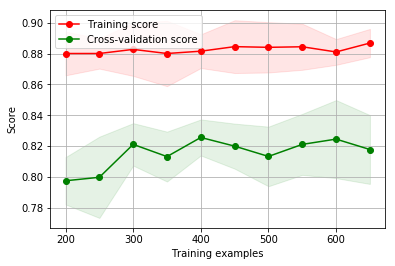

In [150]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.xlabel('Training examples')
plt.ylabel('Score')